# TMDb dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Preprocessing">Data Preprocessing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  [link](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True)

	
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


- **note:** _adj id used rather than actual value due to the change of the vlaue of the currancy through the years. this change in value is significant since the data available goes back to 1960

In [1]:
# importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# takes a df column and split (|) and count each uniqe element n the column
def split_Count(x):
    unique_col_count= {}

    for row_list in x:
        row_list = row_list.split('|')

        for row_element in row_list:
            if row_element in unique_col_count.keys():
                unique_col_count[row_element] +=1
            else:
                unique_col_count[row_element] =1
    return unique_col_count

<a id='Preprocessing'></a>
## Data Preprocessing

### accessing the file data:
the file has 10866 rows and 21 columns

In [4]:
# load data from files and explore the coulumns:

df = pd.read_csv('data/tmdb-movies.csv')
print(df.shape)
df.head(1)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### inspecting the data:

the movie dataset contains: id columns unique to each movie, columns providing financial information like revenue, columns that provide rating features like popularity, and other columns include cast, production companies, and director.

**the following issues were discovered:**
1. almost **half** the dataset budget, budget_adj, revenue and revenue_adj column values are **"0"**.
2. 10% of the production_companies column rows are NaNs.
3. overview, keywords, tagline: needs a more advanced text analysis to provide useful data like pridecting good plots
4. release date: column format yy creates an issue, since dates start from 1960 to 2015.
5. id, imdb_id, homepage: doesnot provide any useful information.

#### Removing unnecessery columns 

In [5]:
# 4. drop columns:
dropped_columns = ['id', 'imdb_id', 'keywords', 'homepage', 'tagline', 'overview' , 'budget', 'revenue']
# drop columns in dropped_columns list
print('dataframe shape: ',df.shape)
df.drop(columns= dropped_columns, inplace= True)
print('workin dataframe shape: ',df.shape)

dataframe shape:  (10866, 21)
workin dataframe shape:  (10866, 13)


### cleaning the data:
1. Removing zero value rows in budget and revenue columns and setting thier value in millions for easier readability.
2. Removing Null and duplicated rows

#### 1. Removing zero value rows in budget and revenue columns and setting thier value in millions for easier readability.

In [6]:
# budget and revenue columns

# inspecting number of  0 values
print('number of zero values in the budget_adj "{}" revenue_adj "{}".'
      .format( df[df.budget_adj == 0.0].shape[0] ,df[df.revenue_adj == 0.0].shape[0]))

# drop zero values
df = df[df.budget_adj != 0.0]
df = df[df.revenue_adj != 0.0]

# reinspecting number of  0 values
print('confirm no zero values in the budget_adj "{}" revenue_adj "{}".'
      .format( df[df.budget_adj == 0.0].shape[0] ,df[df.revenue_adj == 0.0].shape[0]))

# format numbers in millions for better readbility
df['budget_adj'] = df['budget_adj']/1000000
df['revenue_adj'] = df['revenue_adj']/1000000
df.shape

number of zero values in the budget_adj "5696" revenue_adj "6016".
confirm no zero values in the budget_adj "0" revenue_adj "0".


(3855, 13)

#### 2. Removing Null and duplicated rows

In [7]:
# 2. inspect and drop duplicates
print()

print('total duplicate rows:', df.duplicated().sum())
df.drop_duplicates(inplace = True)

# 3. inspect dataset for nulls and drop null rows
df['production_companies'] = df['production_companies'].fillna('missing')
print('total nulls in the dataset: ',df.isnull().sum().sum())
df = df.dropna()

# confirm no duplicates or nulls
print('confirm no nulls: ', df.isnull().sum().sum())
print('confirm no duplicates: ', df.duplicated().sum())

# final shape
print("the shape of the df: ", df.shape)
print()
df.info()


total duplicate rows: 1
total nulls in the dataset:  5
confirm no nulls:  0
confirm no duplicates:  0
the shape of the df:  (3849, 13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3849 non-null   float64
 1   original_title        3849 non-null   object 
 2   cast                  3849 non-null   object 
 3   director              3849 non-null   object 
 4   runtime               3849 non-null   int64  
 5   genres                3849 non-null   object 
 6   production_companies  3849 non-null   object 
 7   release_date          3849 non-null   object 
 8   vote_count            3849 non-null   int64  
 9   vote_average          3849 non-null   float64
 10  release_year          3849 non-null   int64  
 11  budget_adj            3849 non-null   float64
 12  revenue_adj           3849 non-null 

### descriptive statistics
various descriptive statistics for each column

In [8]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3849.000000
mean,1.192933,109.217459,528.387114,6.168693,2001.258249,4.429360e+01,137.231319
std,1.475622,19.914141,880.333629,0.794697,11.285642,4.481360e+01,216.201762
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-07,0.000002
25%,0.463337,95.000000,71.000000,5.700000,1995.000000,1.316623e+01,18.430229
50%,0.798582,106.000000,205.000000,6.200000,2004.000000,3.005030e+01,61.813934
75%,1.374300,119.000000,581.000000,6.700000,2010.000000,6.076720e+01,163.411534
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+02,2827.123750


In [9]:
# identifing all the unique genre tags in the genre column
unique_genres = []
for i in range(5):
    unique_genres.extend ( df.genres.str.split('|',expand= True).iloc[:,i].unique() )

# removing less popular tags  
unique_genres = list(set(unique_genres))
unique_genres.remove(None)
unique_genres.remove('Foreign')
unique_genres.remove('TV Movie')
unique_genres = np.array(unique_genres)
unique_genres

array(['Adventure', 'Action', 'Comedy', 'Music', 'Crime', 'Mystery',
       'History', 'Romance', 'Drama', 'Documentary', 'Western',
       'Thriller', 'Horror', 'Science Fiction', 'Animation', 'Family',
       'Fantasy', 'War'], dtype='<U15')

In [10]:
# creating dummy columns for every every tag in the genre column
for i in unique_genres:
    df[i] = df.genres.str.contains(i) 
df.loc[:, unique_genres[0]:].sum()

Adventure           749
Action             1085
Comedy             1357
Music               134
Crime               651
Mystery             344
History             129
Romance             666
Drama              1753
Documentary          31
Western              52
Thriller           1203
Horror              463
Science Fiction     519
Animation           201
Family              425
Fantasy             396
War                 119
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### 1)  what is the most produced movie genres?

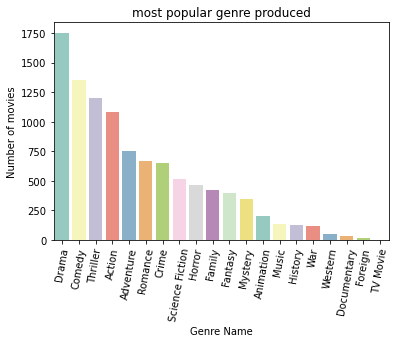

In [11]:
genres_count = split_Count(df.genres)
genres_count_sort = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse = True ))
ax = sns.barplot(x= list(genres_count_sort.keys()), y= list(genres_count_sort.values()),palette = "Set3")
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set(xlabel= 'Genre Name' , ylabel= 'Number of movies'  , title= 'most popular genre produced');

### 2) what is the top production companies?

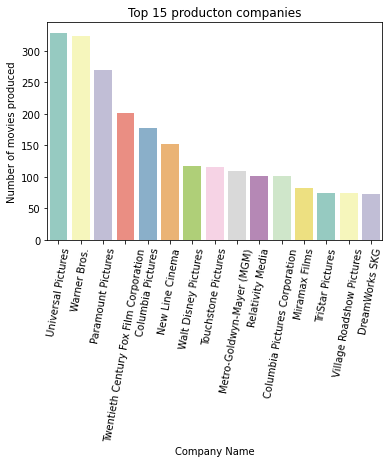

In [12]:
genres_count = split_Count(df.production_companies)
genres_count_sort = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse = True ))
ax = sns.barplot(x =list(genres_count_sort.keys())[:15],y = list(genres_count_sort.values())[:15],palette = "Set3")
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set(xlabel= 'Company Name' , ylabel= 'Number of movies produced'  , title= 'Top 15 producton companies');

### 3)  who is the top actors?

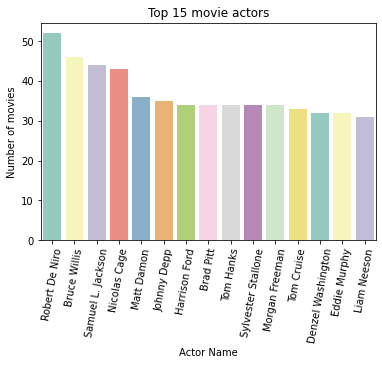

In [13]:
genres_count = split_Count(df.cast)
genres_count_sort = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse = True ))
ax = sns.barplot(x = list(genres_count_sort.keys())[:15],y =list(genres_count_sort.values())[:15],palette = "Set3")
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set(xlabel= 'Actor Name' , ylabel= 'Number of movies'  , title= 'Top 15 movie actors');

### 4)  who is the top directors?

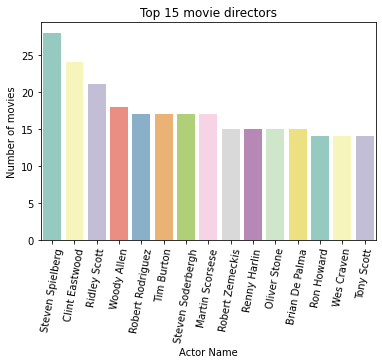

In [14]:
genres_count = split_Count(df.director)
genres_count_sort = dict(sorted(genres_count.items(), key=lambda item: item[1], reverse = True ))
ax = sns.barplot(x= list(genres_count_sort.keys())[:15],y = list(genres_count_sort.values())[:15],palette = "Set3")
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set(xlabel= 'Actor Name' , ylabel= 'Number of movies'  , title= 'Top 15 movie directors');

### 5)  Which genres are has highest popularity popularity form years to year? 

number of rows(years):  56


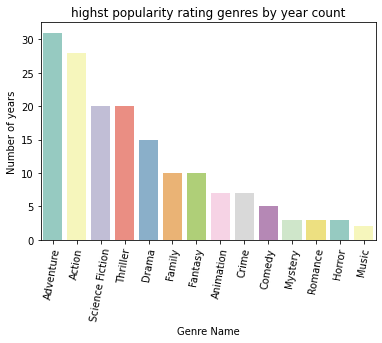

In [15]:
# create a data frame grouped by max() in the year
df_year_mx = df.groupby(['release_year']).max()
print('number of rows(years): ', df_year_mx.shape[0])


# match the max yearly popularity rating with its corspondig values in the dataset
dfp = pd.DataFrame(data= [] , columns = df.columns)
tempdf = pd.DataFrame(data= [] , columns = df.columns)

for i in range(len(df_year_mx.index)):
    tempdf = df[df.popularity == df_year_mx.popularity.iloc[i]]
    dfp =  pd.concat ([tempdf, dfp])

# creat a dict with all the unique genres and thier count in the max popularity year df
popularity_genres_count = split_Count(dfp.genres)

sorted_popular_genre = dict(sorted(popularity_genres_count.items(), key=lambda item: item[1], reverse = True))

ax = sns.barplot(x = list(sorted_popular_genre.keys()), y =list(sorted_popular_genre.values()),palette = "Set3")
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set(xlabel= 'Genre Name' , ylabel= 'Number of years'  , title= 'highst popularity rating genres by year count');

In [16]:
list(sorted_popular_genre.values())

[31, 28, 20, 20, 15, 10, 10, 7, 7, 5, 3, 3, 3, 2]

number of rows(years):  56


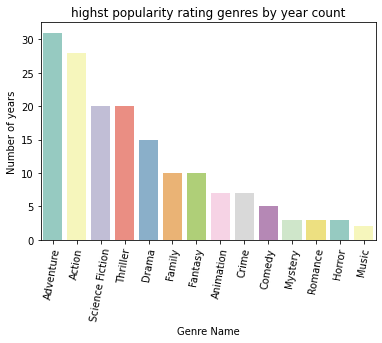

In [17]:
# create a data frame grouped by max() in the year
df_year_mx = df.groupby(['release_year']).max()
print('number of rows(years): ', df_year_mx.shape[0])


# match the max yearly popularity rating with its corspondig values in the dataset
dfp = pd.DataFrame(data= [] , columns = df.columns)
tempdf = pd.DataFrame(data= [] , columns = df.columns)

for i in range(len(df_year_mx.index)):
    tempdf = df[df.popularity == df_year_mx.popularity.iloc[i]]
    dfp =  pd.concat ([tempdf, dfp])

# creat a dict with all the unique genres and thier count in the max popularity year df
popularity_genres_count = split_Count(dfp.genres)

sorted_popular_genre = dict(sorted(popularity_genres_count.items(), key=lambda item: item[1], reverse = True))

ax = sns.barplot(x = list(sorted_popular_genre.keys()), y =list(sorted_popular_genre.values()),palette = "Set3")
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set(xlabel= 'Genre Name' , ylabel= 'Number of years'  , title= 'highst popularity rating genres by year count');

### 6)  investigating the popularity of movies from year to year?

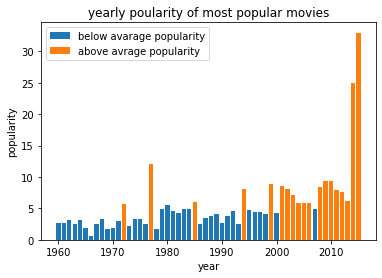

In [18]:
# year by year popularity distrbution with above avg years:
plt.bar(dfp.release_year, dfp.popularity);
plt.bar(dfp[dfp['popularity'] > dfp.popularity.mean()]['release_year'], dfp[dfp['popularity']> dfp.popularity.mean()]['popularity']);
plt.title('yearly poularity of most popular movies')
plt.xlabel('year')
plt.ylabel('popularity')
plt.legend(['below avarage popularity','above avrage popularity']);

**Year by year popularity distrbution with more popular years highligted:**
- it seams that the movie industry was growing slowly and started to preform above avarage above the ear 2000 excluding the year 2009, probably due to the economic conditions.
- there is an increase in popularity in the years 2014 and 2015, further data is needed to determine to detrmine if its a spike or an overall increase in popularity. 
- a quick google search about when did streaming become popular shows that netflix started streaming 2007 and became popular 2016. there maybe a corellation between popularity and streaming

### 7)  investigating the revenue of the most popular movies from year to year

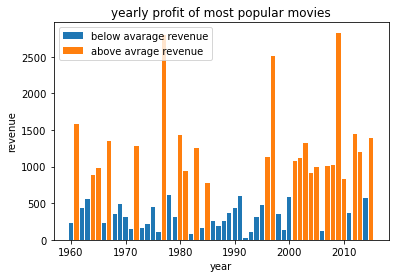

In [19]:
plt.bar(dfp.release_year, dfp.revenue_adj);
plt.bar(dfp[dfp.revenue_adj> dfp.revenue_adj.mean(skipna = True)]['release_year'], dfp[dfp.revenue_adj> dfp.revenue_adj.mean(skipna = True)]['revenue_adj']);
plt.title('yearly profit of most popular movies')
plt.xlabel('year')
plt.ylabel('revenue')
plt.legend(['below avarage revenue','above avrage revenue']);

**Year by year profit distrbution with more profitable years highligted:**

- yearly high profits are linked to the most popular movie of the year as almost all above avrage popularity movies before 2000 have above avrage profits 
- the dip in profit in 2010 might be correlated to the 2008 financial crisis

### 8)  investigating correlation

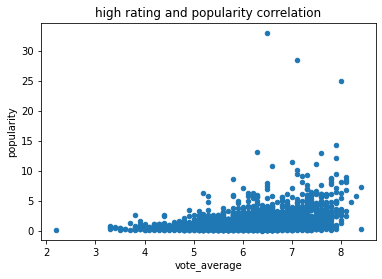

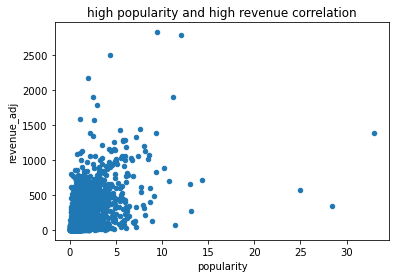

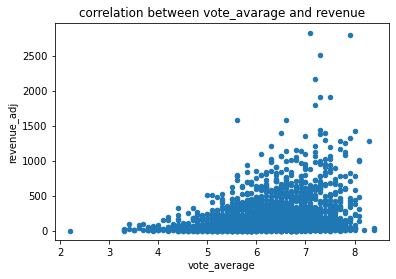

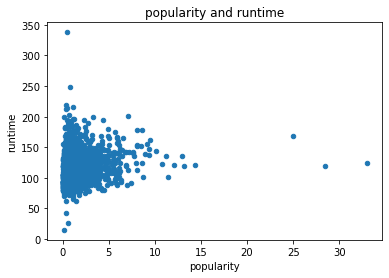

In [20]:
# correlation between high rating and popularity
df.plot(x ='vote_average' , y= 'popularity' , kind= 'scatter')
plt.title('high rating and popularity correlation')

# correlation between popularity and revenue 
df.plot(x = 'popularity', y= 'revenue_adj', kind= 'scatter')
plt.title('high popularity and high revenue correlation')


# correlation between vote_avarage and revenue 
df.plot(x = 'vote_average', y= 'revenue_adj', kind= 'scatter')
plt.title('correlation between vote_avarage and revenue')


# correlation between popularity and runtime
df.plot(x = 'popularity', y= 'runtime', kind= 'scatter')
plt.title('popularity and runtime');

### _Conclusion_:

the dataset contains alot of valuble data wich can lead to many finding with respect to the movie industry. however, there is some major limitation especially when working on the financial aspect; most of the budget and revenue data are set to zeros. these zeros affect the correlation results, thats why it was important to drop these values. further more alot of null are present in the production companies and cast datasets that needed to be droped to find the top actors like Robert de niro. action and adventure genres are tied as the most popular movie genres bieng the geres of the most popular movie of the year for more than 30 years. the distrbution of the above abarage most popular movie rating and above avrage revenue over the years reinforce the positive correletion between the revenue and the popularity of a movie 

In [22]:
# exorting data into excel file format
# or overwrite the file to update the excel data source
df.to_excel(excel_writer = 'data/clean_tmdb.xlsx')